In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
from os import listdir
import cv2
import matplotlib.pyplot as plt
import imutils
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras import layers
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve

In [ ]:
os.listdir('/content/drive/MyDrive/brain/brain_tumor_dataset')

['no', 'yes']

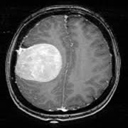

In [ ]:
#showing image of tumor
im = Image.open('/content/drive/MyDrive/brain/brain_tumor_dataset/yes/Y1.jpg').resize((128, 128))
im

In [ ]:
#setting the directory of our data
yes = os.listdir('/content/drive/MyDrive/brain/brain_tumor_dataset/yes')
no = os.listdir('/content/drive/MyDrive/brain/brain_tumor_dataset/no')

#concate two data
data = np.concatenate([yes,no])
assert (len(data) == len(yes)+len(no))

#mapping our classes to 1 and 0. 1 == yes and 0 == no
target_x = np.full(len(yes),1)
target_y = np.full(len(no),0)

#label of our data
data_target = np.concatenate([target_x,target_y])

assert (len(data_target) == len(target_x)+len(target_y))
assert (len(data_target) == len(data))

print(len(target_x), len(target_y))

155 99


In [ ]:
#setting the directory of our data
yes = os.listdir('/content/drive/MyDrive/brain/brain_tumor_dataset/yes')
no = os.listdir('/content/drive/MyDrive/brain/brain_tumor_dataset/no')

#concate two data
data = np.concatenate([yes,no])
assert (len(data) == len(yes)+len(no))

#mapping our classes to 1 and 0. 1 == yes and 0 == no
target_x = np.full(len(yes),1)
target_y = np.full(len(no),0)

#label of our data
data_target = np.concatenate([target_x,target_y])

assert (len(data_target) == len(target_x)+len(target_y))
assert (len(data_target) == len(data))

print(len(target_x), len(target_y))

155 99


In [ ]:
#Setting the height and width of the image for our model
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMAGE_SIZE = [IMG_HEIGHT, IMG_WIDTH]

In [ ]:
X_data = []
count=0;
#reading images from directory, resizeing to IMG_HEIGHT * IMG_WIDTH * 3 and appending images to a list
for file in yes:
  count=count+1
  print(count)
  img = cv2.imread('/content/drive/MyDrive/brain/brain_tumor_dataset/yes/'+file)
  img2 = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
  (b, g, r) = cv2.split(img2) 
  img = cv2.merge([r,g,b])
  X_data.append(img)

for file in no:
  images = [img for img in os.listdir('/content/drive/MyDrive/brain/brain_tumor_dataset/no') if img.endswith(".jpg")]
  img2 = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
  (b, g, r) = cv2.split(img2) 
  img = cv2.merge([r,g,b])
  X_data.append(img)

X_data = np.squeeze(X_data)
assert (len(X_data) == len(data) == len(data_target))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155


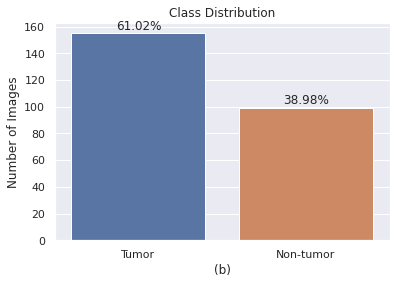

In [ ]:
labels = []
for x in data_target:
  if x == 0:
    labels.append('Non-tumor')
  else:
    labels.append('Tumor')

total = len(labels)

#sns.set(style="darkgrid")
ax = sns.countplot(x=labels)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/total),
            ha="center") 

plt.title('Class Distribution')
plt.ylabel('Number of Images')
plt.xlabel('(b)')
plt.show()

In [ ]:
X=np.array(X_data)
X_data[250].shape == X[250].shape
print(X[250].shape)

(224, 224, 3)


In [ ]:
X = X.astype('float32')
X /= 255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, data_target, random_state=50, test_size=0.15, stratify = data_target)

print(len(y_train))
print(len(y_test))

215
39


In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights="imagenet", input_shape=(224,224,3),include_top=False,)

In [ ]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
outputs = keras.layers.Dense((1),activation="sigmoid")(x)

mobilenet_model = keras.Model(inputs, outputs, name='BrainTumourDetection')
mobilenet_model.summary()

Model: "BrainTumourDetection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 1,02

In [ ]:
mobilenet_model.compile(optimizer="Adam",
                        loss='binary_crossentropy',
                        metrics=['acc'])

In [ ]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import EarlyStopping

# EarlyStopping callback.
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=3, 
                           verbose=1)

callbacks_list = [early_stop]

history = mobilenet_model.fit(X_train,
                              y_train,
                              validation_split = 0.18,
                              epochs=10,
                              batch_size=64,
                              callbacks=callbacks_list)

Epoch 1/10
3/3 [==============================] - 11s 3s/step - loss: 0.5497 - acc: 0.7045 - val_loss: 0.4868 - val_acc: 0.8718
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 0.4170 - acc: 0.8636 - val_loss: 0.3595 - val_acc: 0.9231
Epoch 3/10
3/3 [==============================] - 7s 2s/step - loss: 0.2972 - acc: 0.9432 - val_loss: 0.2641 - val_acc: 0.9231
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 0.2480 - acc: 0.9545 - val_loss: 0.1891 - val_acc: 0.9744
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 0.1730 - acc: 0.9659 - val_loss: 0.1413 - val_acc: 1.0000
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 0.1519 - acc: 0.9830 - val_loss: 0.1116 - val_acc: 1.0000
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.1444 - acc: 0.9773 - val_loss: 0.0908 - val_acc: 1.0000
Epoch 8/10
3/3 [==============================] - 7s 2s/step - loss: 0.1112 - acc: 0.9773 - val_loss: 0.0738 -

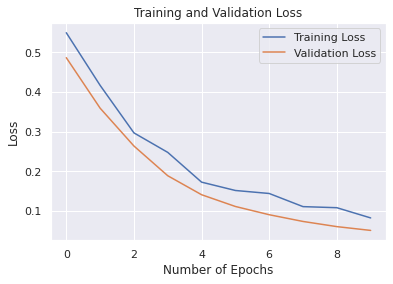

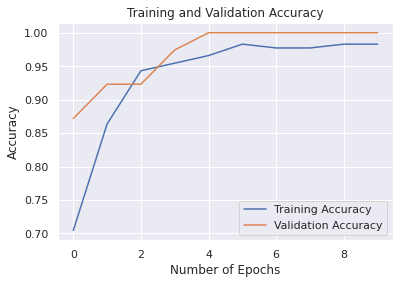

In [ ]:
history = mobilenet_model.history.history

train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['acc']
val_acc = history['val_acc']


    
# Loss
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
    
# Accuracy#
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test set
score = mobilenet_model.evaluate(X_test, y_test, verbose=0) 

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9487179517745972


In [ ]:
y_hat = mobilenet_model.predict(X_test)
y_pred = [1 if x >= 0.5 else 0 for x in y_hat]

#metrics calculation

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print('Specificity: ',specificity)

#classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.948718
Precision: 1.000000
Recall: 0.916667
F1 score: 0.956522
Cohens kappa: 0.894309
ROC AUC: 0.958333
[[15  0]
 [ 2 22]]
Specificity:  1.0
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.92      0.96        24

    accuracy                           0.95        39
   macro avg       0.94      0.96      0.95        39
weighted avg       0.95      0.95      0.95        39



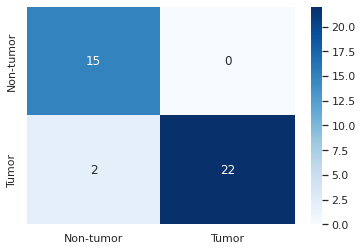

In [ ]:
# plot confusion matrix
categories = ['Non-tumor', 'Tumor']
df_matrix = pd.DataFrame(matrix, index = categories, columns = categories)
sns.heatmap(df_matrix, annot=True, cmap='Blues', fmt='d')

In [ ]:
#index 0 = No , index 1 = Yes
labels = ["No", "Yes"]

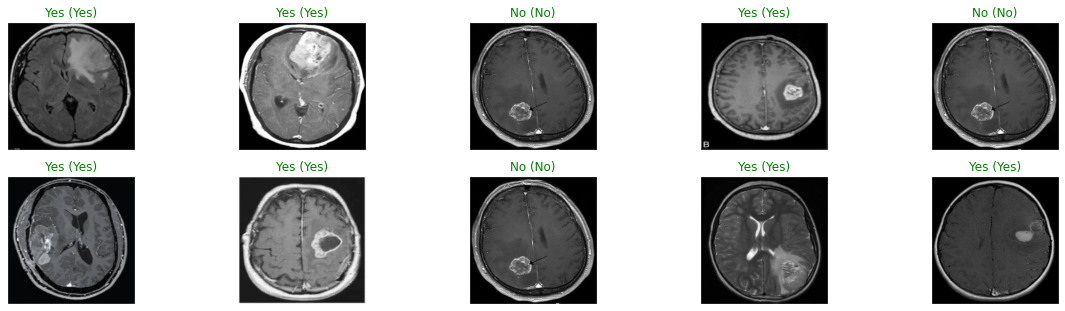

In [ ]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  # Display each image
  ax.imshow(np.squeeze(X_test[index]))
  predict_index = y_pred[index]
  true_index = y_test[index]
  # Set the title for each image
  ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
